In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [4]:
data = data[data.horsepower != '?']

In [5]:
x = data.loc[:, ['cylinders', 'displacement', 'weight', 'acceleration']].values
y = data.loc[:, ['mpg']].values
print(x.shape, y.shape)

(392, 4) (392, 1)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(313, 4) (313, 1)
(79, 4) (79, 1)


In [7]:
X_min = X_train.min(axis=0, keepdims=True)
X_max = X_train.max(axis=0, keepdims=False)
X_train_scaled = (X_train - X_min) / (X_max - X_min)
X_test_scaled = (X_test - X_min) / (X_max - X_min)

In [8]:
def predict(X, w):
  y_pred = np.dot(X, w)
  return y_pred
def loss(y_true, y_pred):
  return np.mean((y_true - y_pred)**2) # Mean Square Error
w = np.zeros((4, 1))
y_pred = predict(X_train_scaled, w)
loss(y_train, y_pred)

620.0295846645367

In [9]:
def grad(X, y, w):
  y_pred = predict(X, w)
  delta = y_pred - y
  dw = np.dot(X.T, delta)
  return dw

In [10]:
w = np.zeros((4, 1))
lr = 0.005
n_epoch = 20
# (2) Calculate gradients
# (3) Update w = w - lr * grad
# (4) Repeat step 2 and 4 n_epoch times
his = []
for i in range(n_epoch):
  dw = grad(X_train_scaled, y_train, w)
  y_pred = predict(X_train_scaled, w)
  his.append(loss(y_train, y_pred))
  
  w -= lr * dw

Text(0, 0.5, 'Loss')

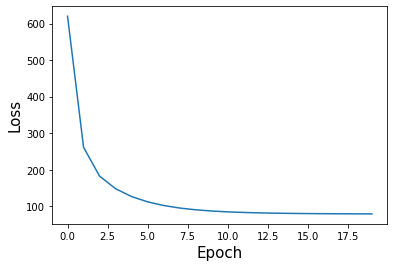

In [11]:
plt.plot(his)
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss", fontsize=15)

In [12]:
def evaluate(y_true, y_pred):
  rmse = np.sqrt(np.mean((y_true - y_pred)**2))
  mae = np.mean(np.abs(y_true - y_pred))
  sst = np.sum((y_true - y_true.mean())**2)
  ssr = np.sum((y_pred - y_true)**2)
  r2 = 1.0 - ssr/sst
  print(f"RMSE = {rmse}")
  print(f"MAE = {mae}")
  print(f"r2-score = {r2}")
y_pred = predict(X_test, w)
evaluate(y_test, y_pred)

RMSE = 2244.003419475028
MAE = 2226.108940626412
r2-score = -98656.793994066


In [13]:
m = X_train.shape[0]
one = np.ones((m, 1))
X_new = np.hstack((one, X_train_scaled))
X_new
w = np.zeros((5, 1))
lr = 0.001
n_epoch = 2000
his = []
for i in range(n_epoch):
  dw = grad(X_new, y_train, w)
  y_pred = predict(X_new, w)
  his.append(loss(y_train, y_pred))
  w -= lr * dw

[18.27736613981536,
 18.277361483544546,
 18.27735683678119,
 18.277352199502012,
 18.277347571683787]

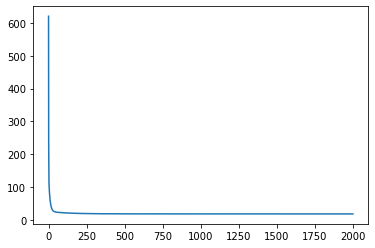

In [14]:
plt.plot(his)
his[-5:]

In [15]:
X_test_new = np.hstack((np.ones((X_test.shape[0], 1)), X_test_scaled))
y_pred = predict(X_test_new, w)
evaluate(y_test, y_pred)

RMSE = 4.255877783339747
MAE = 3.5038075201759527
r2-score = 0.6451354087862771
